In [4]:
# !pip install surya-ocr torch torchvision transformers Pillow

In [ ]:
from surya.foundation import FoundationPredictor
from surya.recognition import RecognitionPredictor
from surya.detection import DetectionPredictor
import torch
import torch
from pdf2image import convert_from_path
import os
from tqdm import tqdm
import numpy as np
import  cv2
device = "mps" if torch.backends.mps.is_available() else "cpu"
def pdf_to_images(path, dpi=300):
    images = []
    if os.path.isfile(path):
        images.extend(convert_from_path(path, dpi=dpi))
    else:
        for pdf_file in tqdm(os.listdir(path), desc="Converting PDFs"):
            if pdf_file.lower().endswith('.pdf'):
                pdf_path = os.path.join(path, pdf_file)
                images.extend(convert_from_path(pdf_path, dpi=dpi))
    print(f"\n✅ Conversion complete!")
    return images

pages = pdf_to_images("/Users/maryamsaad/Documents/arabic-ocr-transformer/من معتمدات الكتب/لسان العرب 15 مجلد/لسان العرب (13).pdf")

  Using cached pdf2image-1.17.0-py3-none-any.whl.metadata (6.2 kB)
Using cached pdf2image-1.17.0-py3-none-any.whl (11 kB)

✅ Conversion complete!


In [ ]:
pages=pages[20:30]  

In [8]:
foundation_predictor = FoundationPredictor()
recognition_predictor = RecognitionPredictor(foundation_predictor)
detection_predictor = DetectionPredictor(device=device)


Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


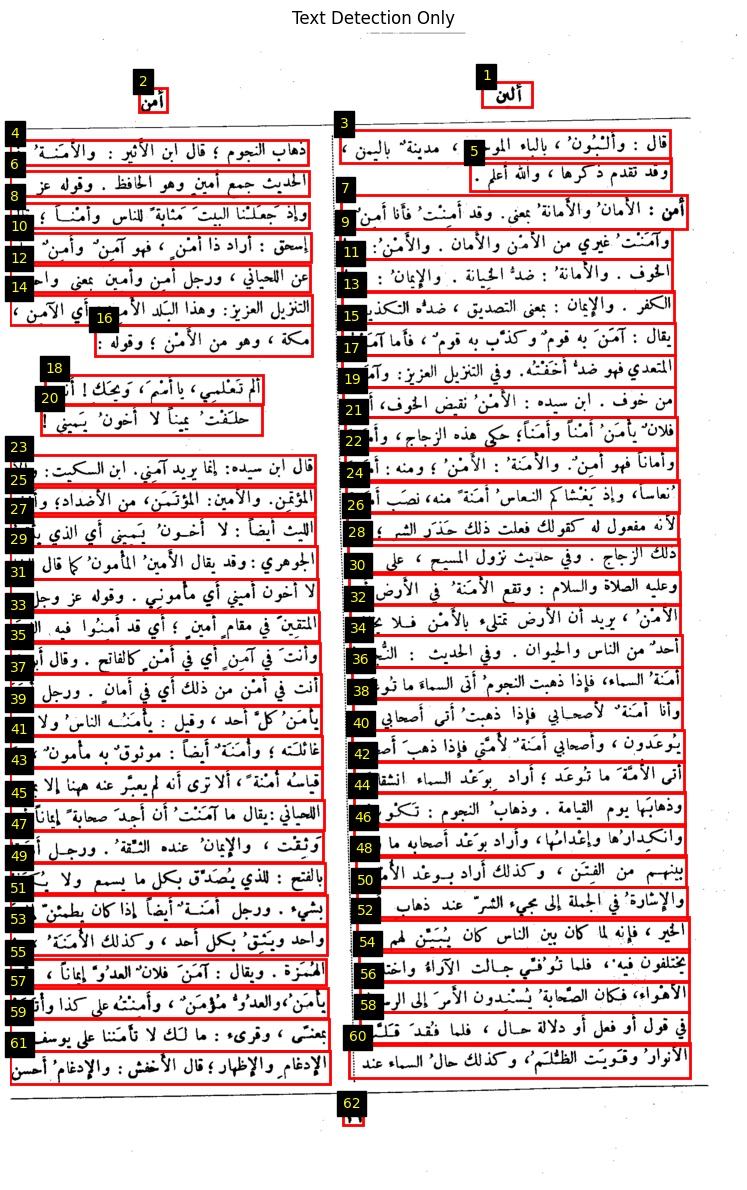

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]s]


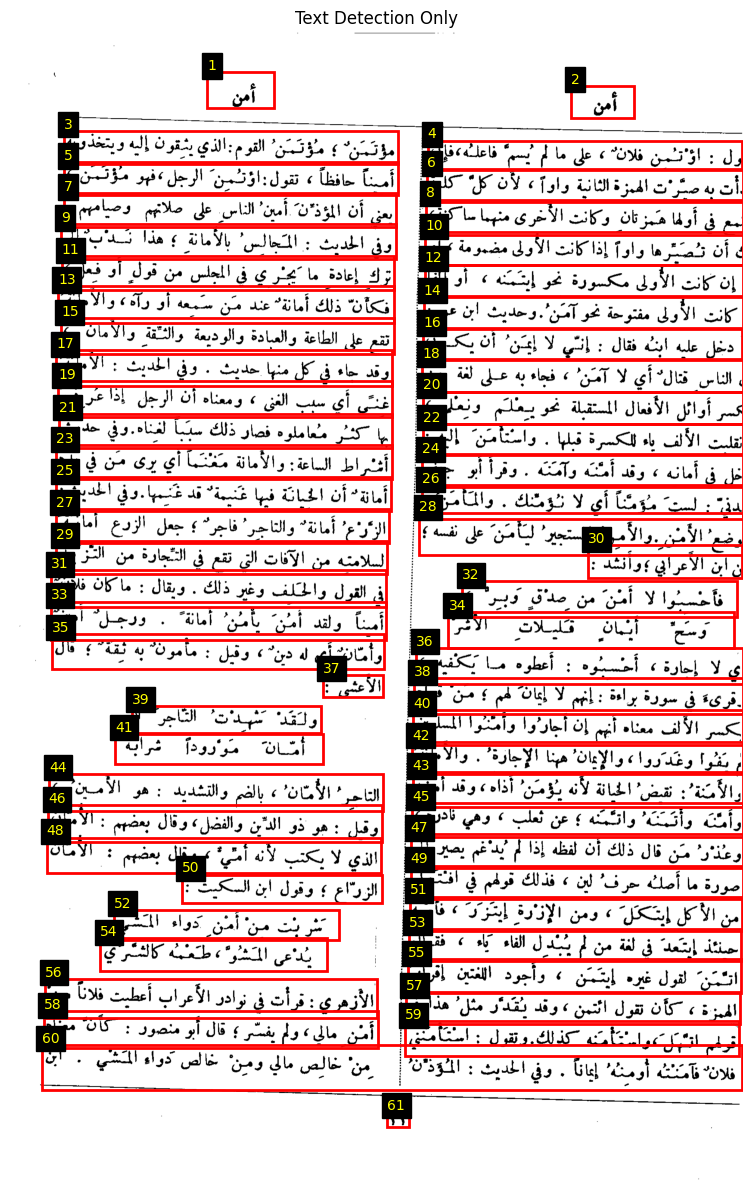

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]s]


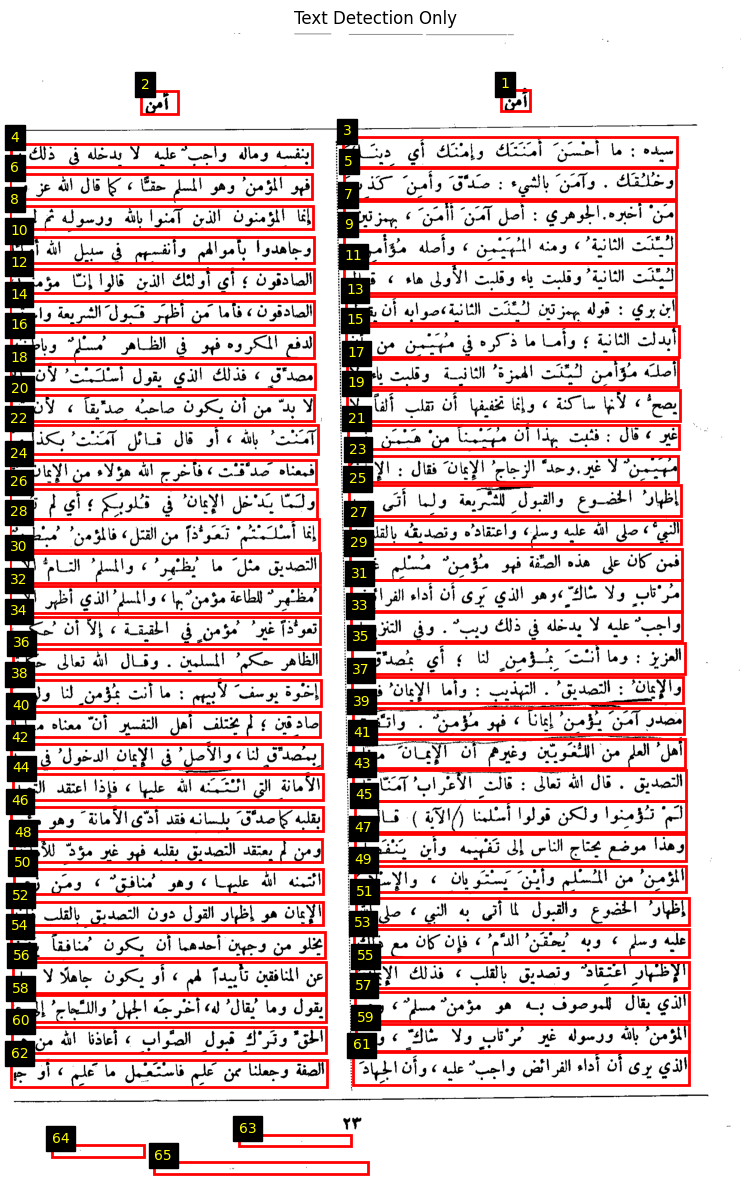

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]s]


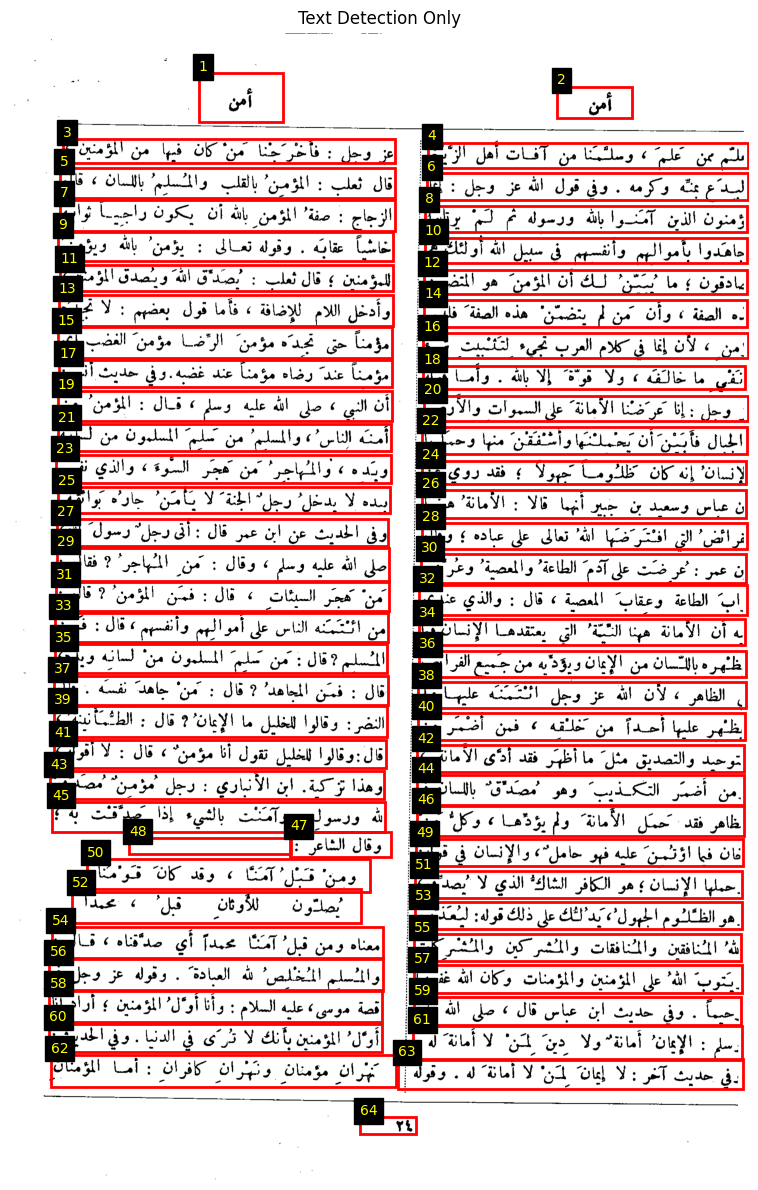

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]s]


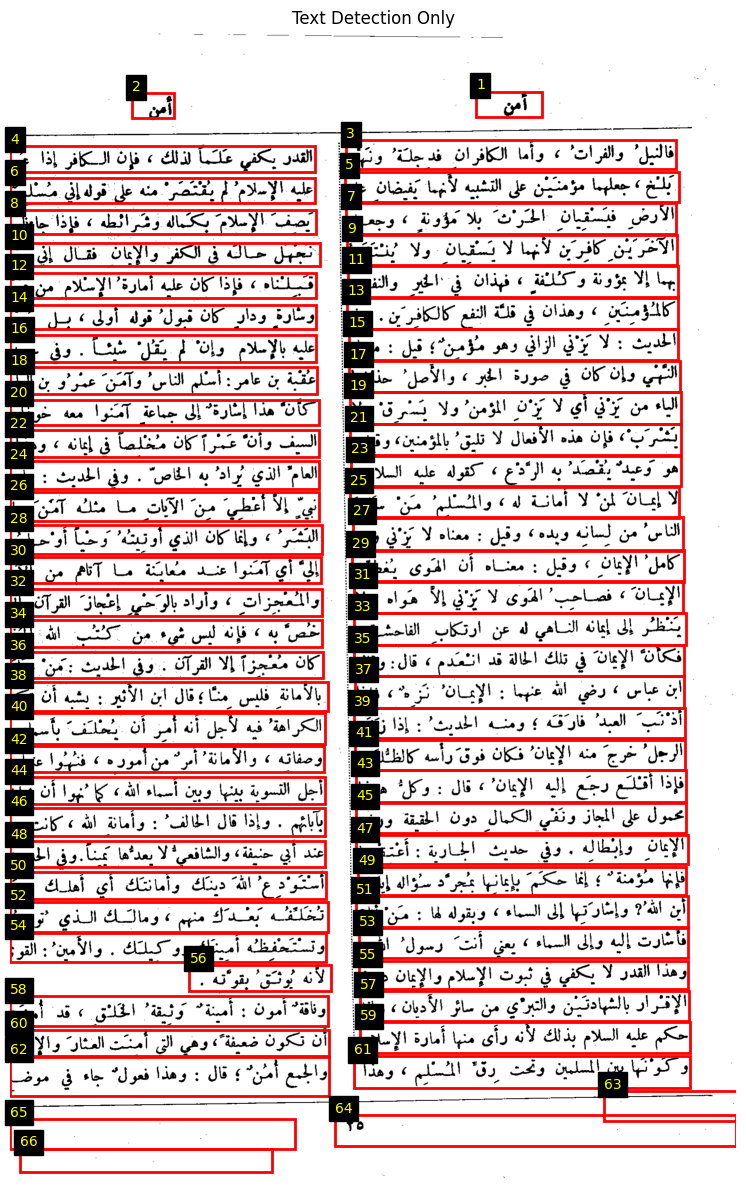

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]s]


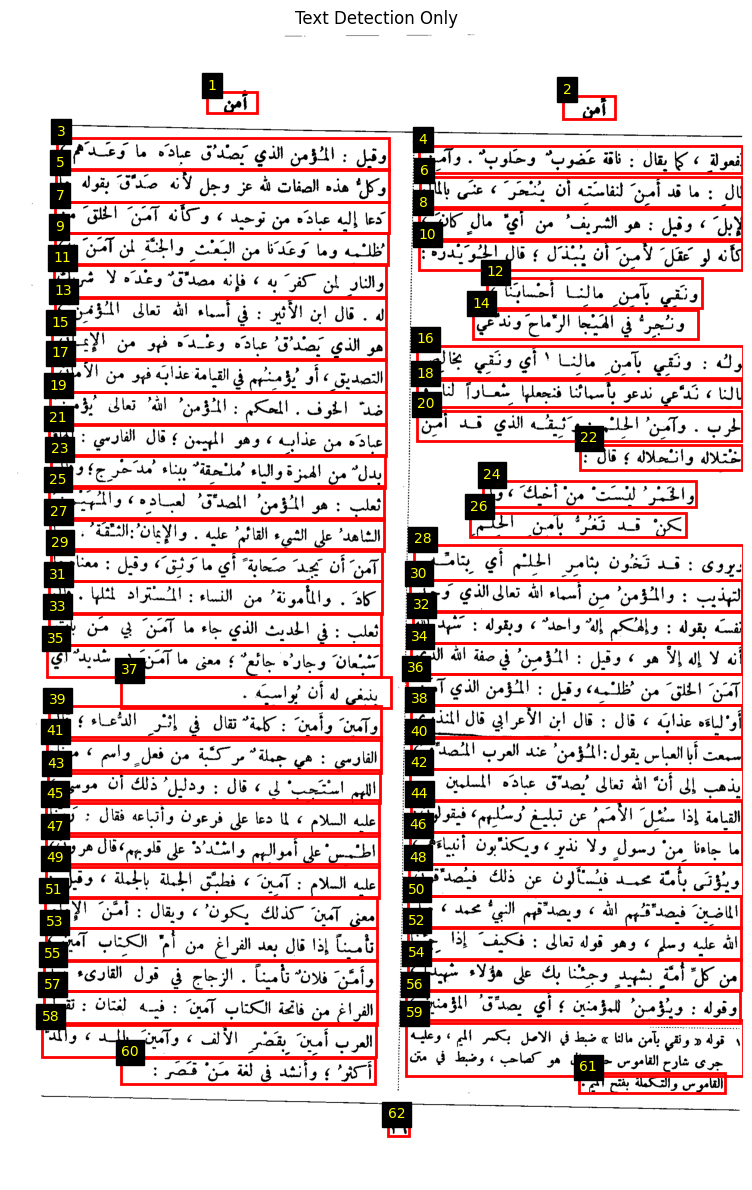

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]s]


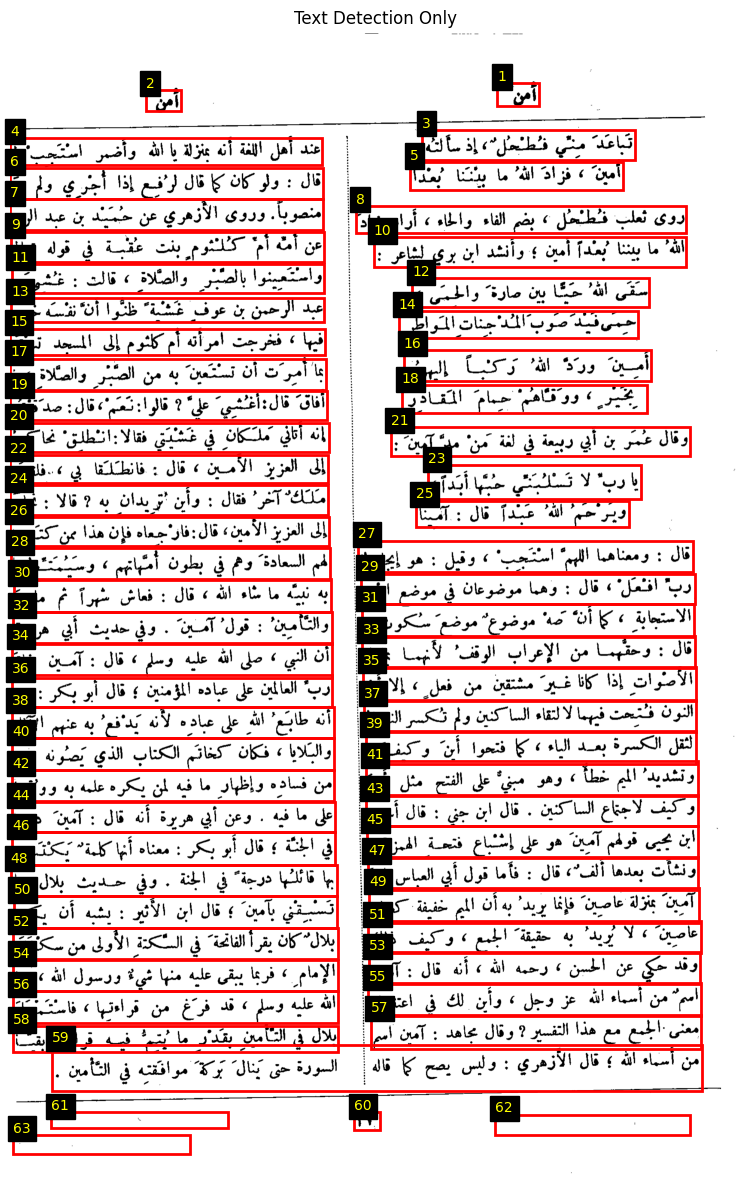

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]s]


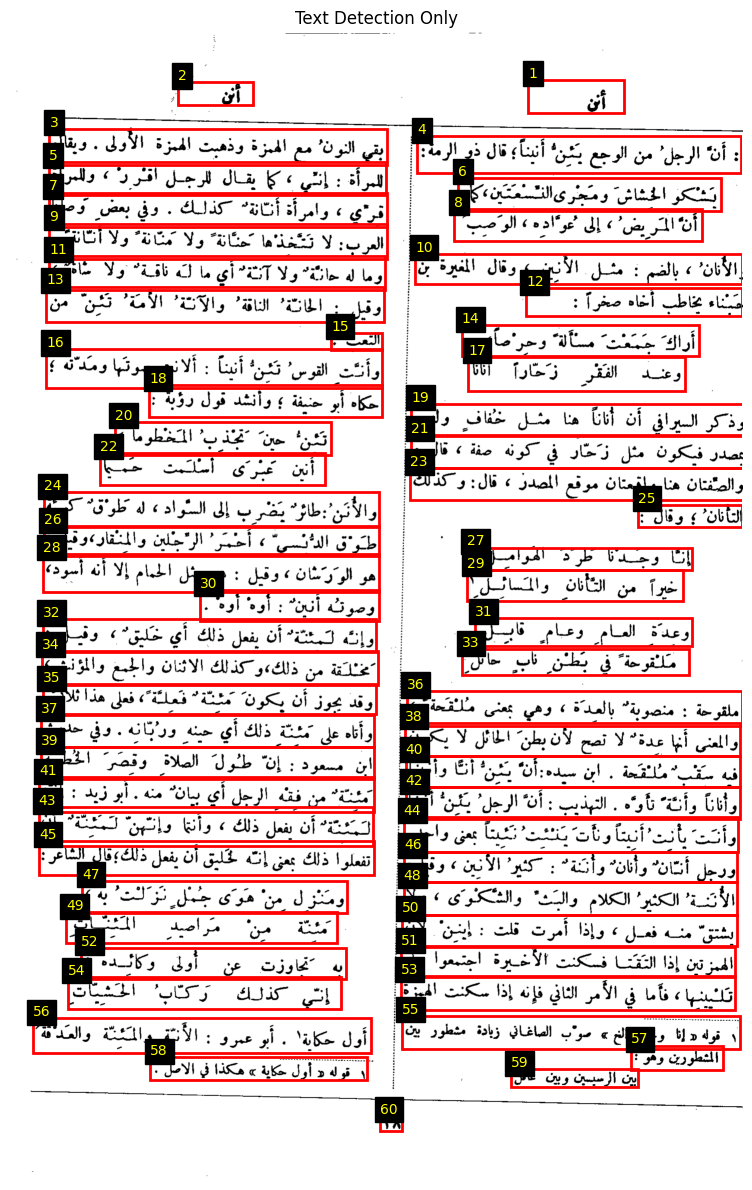

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]s]


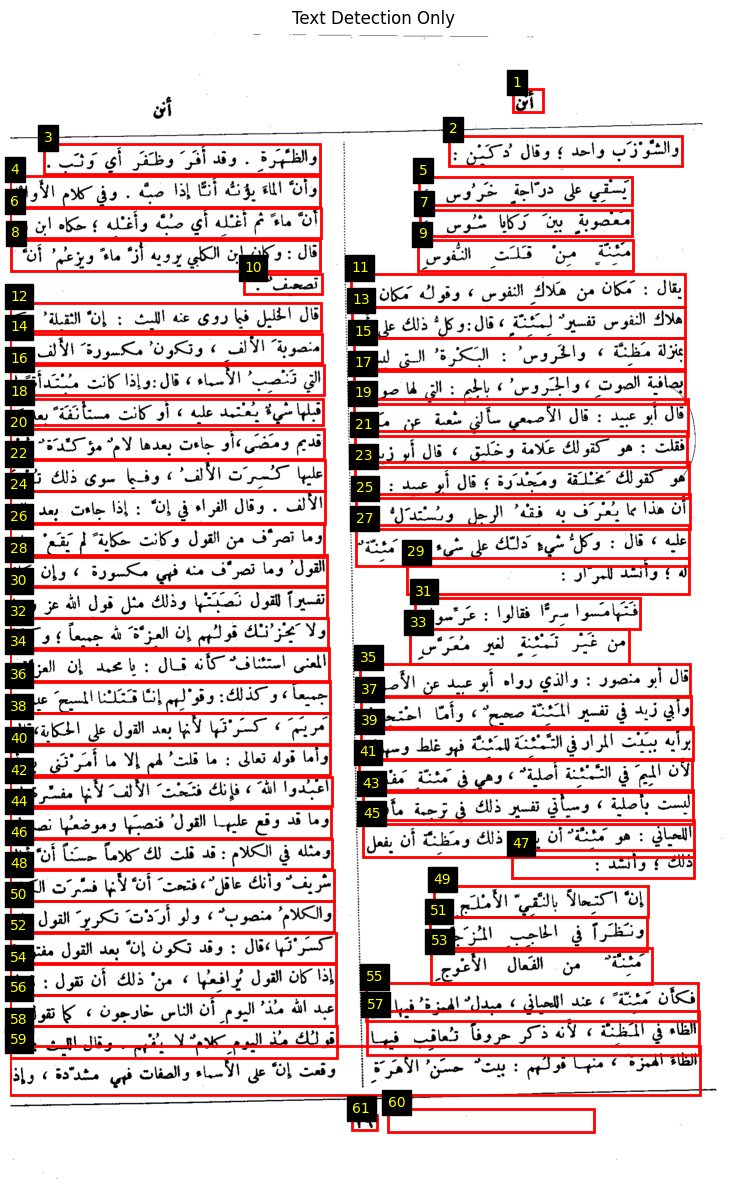

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]s]


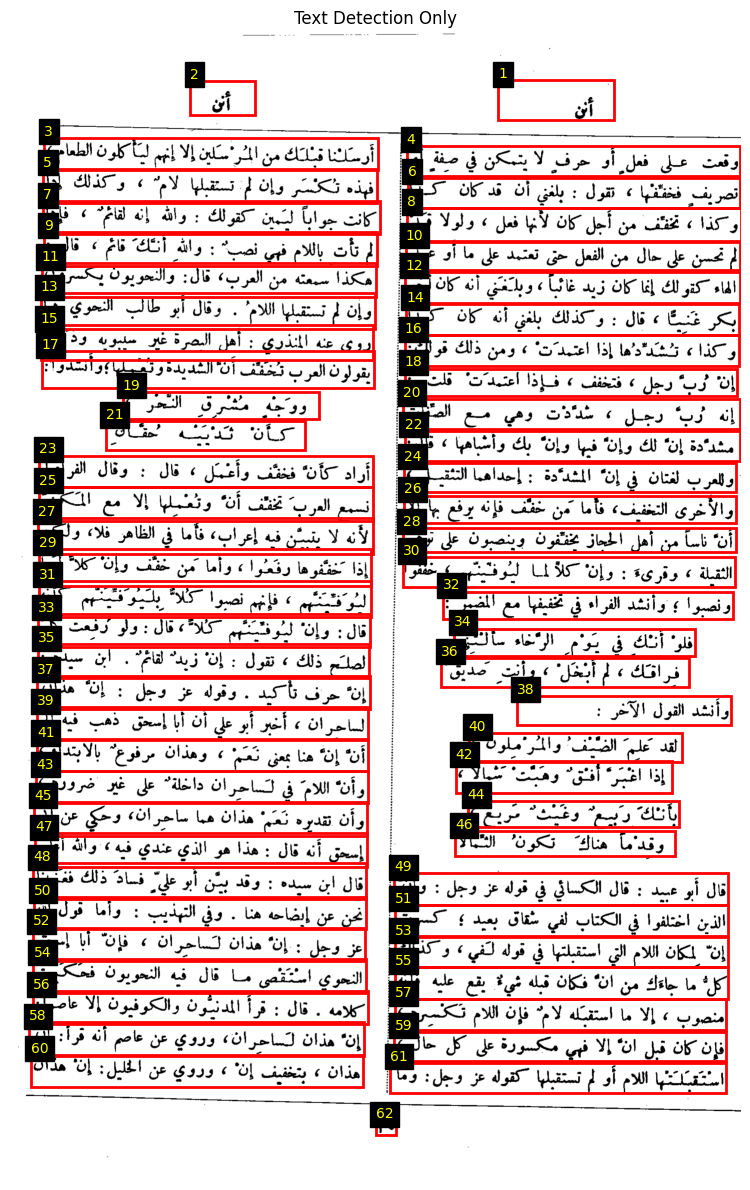

Processing Images: 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


In [ ]:
# Run detection only
foundation_predictor = FoundationPredictor()
recognition_predictor = RecognitionPredictor(foundation_predictor)
detection_predictor = DetectionPredictor(device=device)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
for image in tqdm(pages, desc="Processing Images"):
    detection_results = detection_predictor([image])
    det_result = detection_results[0]

    fig, ax = plt.subplots(figsize=(16, 12))
    ax.imshow(image)

    for i, bbox in enumerate(det_result.bboxes):
        x1, y1, x2, y2 = bbox.bbox
        width, height = x2 - x1, y2 - y1
        
        rect = patches.Rectangle(
            (x1, y1), width, height,
            linewidth=2,
            edgecolor="red",
            facecolor="none"
        )
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, f"{i+1}", color="yellow", fontsize=10, backgroundcolor="black")

    plt.title("Text Detection Only")
    plt.axis("off")
    plt.tight_layout()
    plt.show()